<a href="https://colab.research.google.com/github/renardelyon/Deep-Learning-with-Python-Exercise/blob/main/Classifying_Movie_Reviews_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#load imdb datasets
from tensorflow.keras.datasets import imdb

(train_features,train_label),(test_features,test_label)=imdb.load_data(
    num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
max([max(sequence) for sequence in train_features])

9999

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()]
)
word_encode = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in train_features[0]]
)
print(word_encode)

1646592/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    result[i,sequence]=1
  return result

X_train = vectorize_sequences(train_features)
X_test = vectorize_sequences(test_features)

In [6]:
X_train.shape

(25000, 10000)

In [27]:
import tensorflow as tf

model = tf.keras.Sequential([
      tf.keras.layers.Dense(16,activation ='tanh',input_shape=(10000,)),
      tf.keras.layers.Dense(1,activation='sigmoid')])

In [28]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['binary_accuracy'])

In [29]:
history = model.fit(X_train,
                    train_label,
                    epochs=20,
                    validation_split=0.2,
                    shuffle=True,
                    batch_size=512).history

Epoch 1/20
40/40 [==============================] - 2s 32ms/step - loss: 0.1888 - binary_accuracy: 0.7371 - val_loss: 0.1079 - val_binary_accuracy: 0.8768
Epoch 2/20
40/40 [==============================] - 1s 26ms/step - loss: 0.0865 - binary_accuracy: 0.9082 - val_loss: 0.0905 - val_binary_accuracy: 0.8876
Epoch 3/20
40/40 [==============================] - 1s 28ms/step - loss: 0.0633 - binary_accuracy: 0.9379 - val_loss: 0.0849 - val_binary_accuracy: 0.8918
Epoch 4/20
40/40 [==============================] - 1s 28ms/step - loss: 0.0520 - binary_accuracy: 0.9505 - val_loss: 0.0829 - val_binary_accuracy: 0.8902
Epoch 5/20
40/40 [==============================] - 1s 28ms/step - loss: 0.0435 - binary_accuracy: 0.9586 - val_loss: 0.0821 - val_binary_accuracy: 0.8896
Epoch 6/20
40/40 [==============================] - 1s 28ms/step - loss: 0.0375 - binary_accuracy: 0.9669 - val_loss: 0.0827 - val_binary_accuracy: 0.8880
Epoch 7/20
40/40 [==============================] - 1s 28ms/step - los

In [30]:
result = model.evaluate(X_test,test_label)
result

782/782 [==============================] - 1s 2ms/step - loss: 0.1110 - binary_accuracy: 0.8590


[0.11102641373872757, 0.8590400218963623]

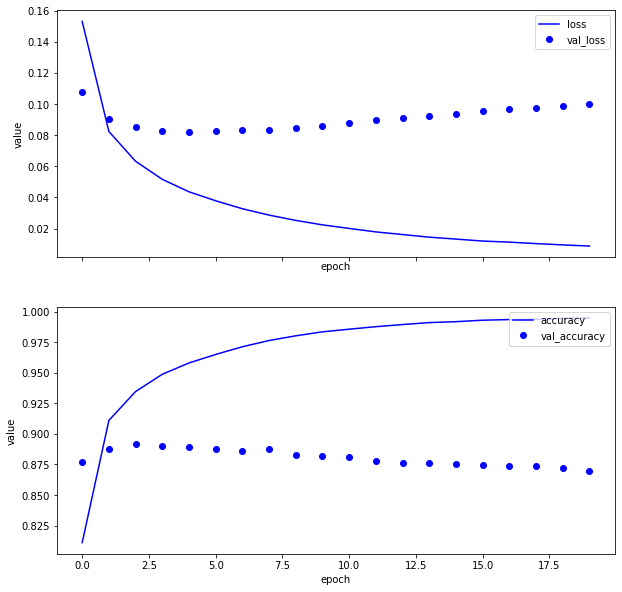

In [31]:
import matplotlib.pyplot as plt

loss = history['loss']
val_loss = history['val_loss']
accuracy = history['binary_accuracy']
val_accuracy = history['val_binary_accuracy']

fig, ax = plt.subplots(2,1,sharex=True,figsize=(10,10))

epoch = range(len(loss))
ax[0].plot(epoch,loss,'b-',label='loss')
ax[0].plot(epoch,val_loss,'bo',label='val_loss')
ax[1].plot(epoch,accuracy,'b-',label='accuracy')
ax[1].plot(epoch,val_accuracy,'bo',label='val_accuracy')
for axs in ax.flat:
    axs.set(xlabel='epoch', ylabel='value')
ax[0].legend(loc=1)
ax[1].legend(loc=1)
plt.show()

In [32]:
predictions = model.predict(X_test)

In [34]:
len(predictions)

25000